In [3]:
from astropy.io import fits

import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt

from marvin import config
config.setRelease('DR17')

from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import numpy as np

import sys
sys.path.insert(1, '/Users/kdouglass/Documents/Research/Rotation_curves/RotationCurves/')
from mapSmoothness_functions import how_smooth

## Import galaxy data

In [4]:
galaxy_ID = '8997-9102'
plate, fiber = galaxy_ID.split('-')

image = Image(plateifu=galaxy_ID)
maps = Maps(plateifu=galaxy_ID)
'''
galaxy_data = fits.open('../manga_files/MaNGA_DR15/pipe3d/' + plate + '/manga-' + galaxy_ID + '.Pipe3D.cube.fits.gz')

#print(galaxy_data[3].data[103])

# Extract H-alpha velocity map (NAME102)
Ha_vel = galaxy_data[3].data[102]
''';

[WARNING]: drpall file not found. Downloading it. (MarvinUserWarning)
Progress: 100%|████████| 1/1 [00:10<00:00, 10.01s/files, n_files=1, n_streams=1]


SDSS_ACCESS> Done!


## Mask "bad" data

In [55]:
'''
mHa_vel = ma.masked_equal(Ha_vel, 0)

mHa_vel0 = mHa_vel - 13900
''';

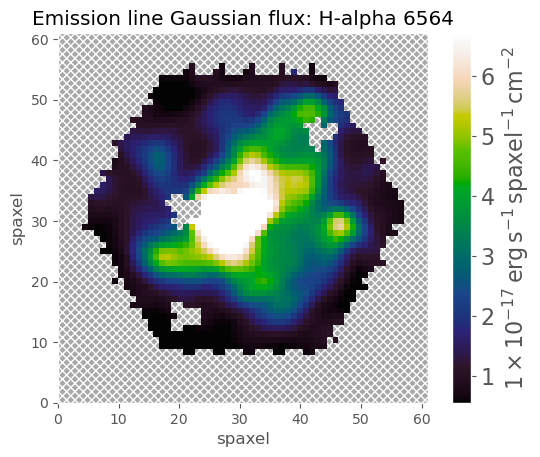

In [6]:
ha_flux = maps.emline_gflux_ha_6564
ha_flux.plot(plt_style='ggplot');

In [7]:
r_band = maps.spx_mflux
mr_band = ma.array(r_band, mask=ha_flux.mask)
center = np.unravel_index(ma.argmax(mr_band), mr_band.shape)
print(center)

(31, 31)


## Plot velocity map

[WARNING]: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead. (MatplotlibDeprecationWarning)


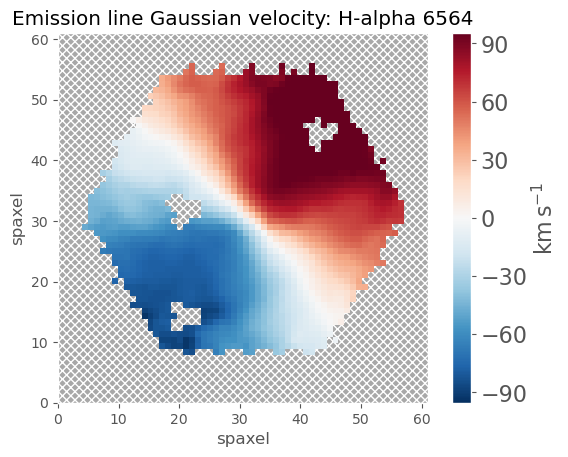

In [16]:
ha_vel = maps.emline_gval_ha_6564
ha_vel.plot(plt_style='ggplot')
plt.show()
'''
plt.figure()
plt.imshow(mHa_vel0, cmap='RdBu_r', origin='lower')
plt.colorbar()
''';

In [12]:
np.sum(ha_vel.mask == 0)

1856

## Smoothness score

In [13]:
mask = np.zeros(ha_vel.shape, dtype=np.uint8)

mask[ha_vel.mask > 0] = 1


score = how_smooth( ha_vel.data, ha_vel.mask)

print(score)

0.5664287435597387


## Display color image

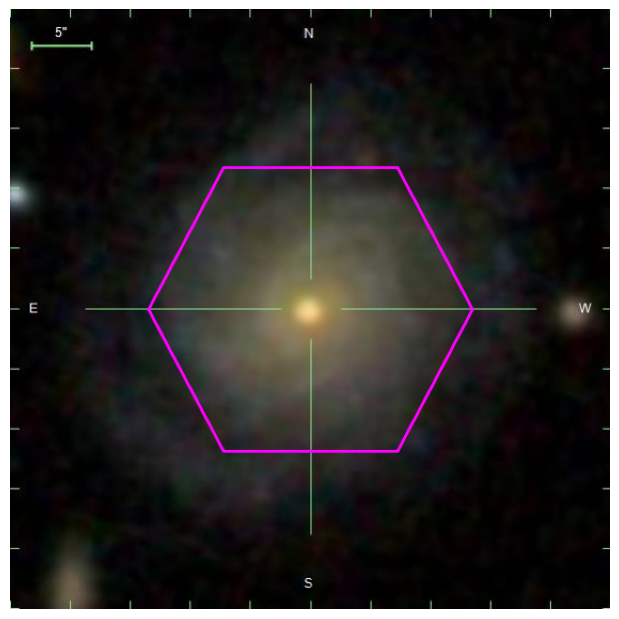

In [17]:
ax = image.plot(#with_axes=True
                 #fibers=True
               )
plt.show()
#ax.figure.savefig('../spirals/Images/DRP/rgb_' + galaxy_ID + '.eps', format='eps', dpi=300);
#ax.figure.savefig('../ellipticals/Images/rgb_' + galaxy_ID + '.eps', format='eps', dpi=300);